<img src="https://live.staticflickr.com/2588/4171571040_bab4a40acf_z.jpg" width="600" height="300">

# Logistic Regression

In statistics, logistic regression is a type of regression analysis used to predict the outcome of a categorical variable (a variable that can adopt a limited number of categories) based on independent or predictor variables.

**TABLE OF CONTENTS**
* [1. Packages and Datasets](#Packages-and-Datasets)
* [2. Logistic Regresion](#Logistic-Regresion)
* [3. Support Vector Machine](#Support-Vector-Machina)
* [4. Random Forest](#Random-Forest)
* [5. XGBoost](#XGBOOST)
* [6. Model Selection](#Model-Selection)
* [7. References](#References)

# Logistic Regresion

Packages install

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
import pickle
import seaborn as sns

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltimport 
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")
import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

Dataset loading and path creation

In [2]:
X_train = pd.read_csv("../data/x_train.csv")
Y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/x_train.csv")
Y_test = pd.read_csv("../data/y_train.csv")

Since data are not treated we load the pipeline

In [3]:
pp = '../pipelines/tratamiento1.sav'
preprocesador= pickle.load(open(pp, 'rb'))

# We implemented the logistic regression model

In [4]:
modelo_logistico = Pipeline(steps=[
    ('preprocesador', preprocesador),
    
    ('clasificador', LogisticRegression(max_iter=1500, 
                                        random_state=1234))])
modelo_logistico.fit(X_train, Y_train)

Pipeline(steps=[('preprocesador',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['int_rate', 'annual_inc', 'fico_range_low', 'fico_range_high',
       'pub_rec', 'total_acc', 'last_fico_range_high', 'last_fico_range_low',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_rcnt_rev_tl_op', 'mort_acc', 'num_bc_sats', 'num_tl_120dpd_2m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit'],
      dtype='object'))])),
     

We check the accuracy of our models
 + Since the difference between the train and the test is small theres no overfitting

In [5]:
modelo_logistico.score(X_train, Y_train)

0.8942395366160485

In [6]:
modelo_logistico.score(X_test, Y_test)

0.8942395366160485

And we predict

In [7]:
Y_pred = modelo_logistico.predict(X_test)

Additionally, we predict the probability of being default or fully paid

In [8]:
Y_prob = modelo_logistico.predict_proba(X_test)

In [9]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     81750
           1       0.92      0.94      0.93    241783

    accuracy                           0.89    323533
   macro avg       0.87      0.85      0.86    323533
weighted avg       0.89      0.89      0.89    323533



## ROCs Curve

 It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis

In [10]:
def roc(model, title):
    
    y_pred_prob = model.predict_proba(X_test)
    
    skplt.metrics.plot_roc(Y_test, y_pred_prob) # un roc con todas las metricas
    plt.title(f"ROCs curve for {title}.");

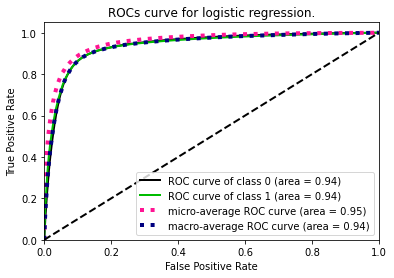

In [11]:
roc(modelo_logistico, 'logistic regression')

We can observe that we have a pretty decent ROC curve since the maximum is 1.

# Confusion Matrix

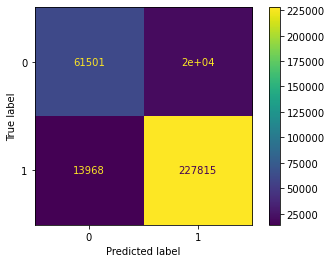

In [12]:
plot_confusion_matrix(modelo_logistico, X=X_test, y_true=Y_test);

According to our confussion Matrix we can observe the following:

+ 61501 True Negatives.
+ 13968 False Positives.
+ 20000 False Negatives.
+ 227815 True Postives.


And we do observe the normalized confusion matrix

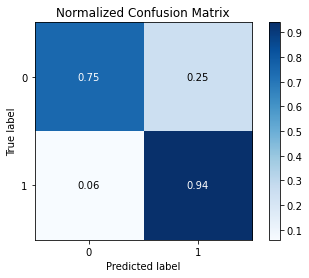

In [13]:

modelprediction_labels = modelo_logistico.predict(X_test)
skplt.metrics.plot_confusion_matrix(Y_test, Y_pred, normalize=True);

With the defaulters, We are  right 75% of the time. With those who pay, we are 94% correct

## Cumalative gains

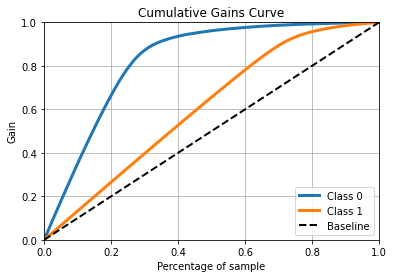

In [14]:
skplt.metrics.plot_cumulative_gain(Y_test, Y_prob);

We see that it is much easier to look for defaulters than paying customers, since looking at 50% I have almost 100% of defaulters and only 70% of those who pay

In [15]:
model = '../model/logistic_regresion.sav'
pickle.dump(modelo_logistico, open(model, 'wb'))

# References

https://realpython.com/logistic-regression-python/